<a href="https://colab.research.google.com/github/Shubhranshu-Malhotra/Tensorflow-Developer-ZTM/blob/main/%5BPractice_Project%5D_02_neural_network_classification_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass Classification Practice Project

To practice multiclass classification we are going to build neural network to classify different types of clothing.  
  
### Labels
Each training and test example is assigned to one of the following labels:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |


## Imports

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Load Data

In [2]:
# The fashion mnist is already divided into test and training data.
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_to_label = { 0 : 'T-shirt/top',
                   1 : 'Trouser',
                   2 : 'Pullover',
                   3 : 'Dress',
                   4 : 'Coat',
                   5 : 'Sandal',
                   6 : 'Shirt',
                   7 : 'Sneaker',
                   8 : 'Bag',
                   9 : 'Ankle boot'
                  }
print("Class Labels Dictionary: ", class_to_label)
print("Total number of classes: ", len(class_to_label))

Class Labels Dictionary:  {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}
Total number of classes:  10


## Visualize loaded dataset

The 10th training example:
[[  0   0   0   0   0   0   0  11 142 200 106   0   0   0   0   0   0   0
   85 185 112   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 152 214 217 194 236 216 187 149 135 153 211 217
  231 205 217 188  34   0   0   0   0   0]
 [  0   0   0   0   0  66 185 166 180 181 190 211 221 197 146 198 206 191
  168 190 172 188 175   0   0   0   0   0]
 [  0   0   0   0   0 135 153 160 175 180 170 186 187 190 188 190 187 174
  195 185 174 161 175  59   0   0   0   0]
 [  0   0   0   0   0 161 147 160 170 178 177 180 168 173 174 171 185 184
  185 172 171 164 174 120   0   0   0   0]
 [  0   0   0   0   2 175 146 145 168 178 181 185 180 184 178 179 187 191
  193 190 181 171 172 158   0   0   0   0]
 [  0   0   0   0  35 177 155 140 151 172 191 187 186 187 186 187 182 191
  194 188 180 161 161 185   0   0   0   0]
 [  0   0   0   0  59 170 153 141 120 154 160 161 172 168 166 161 165 172
  170 164 139 149 162 166  21   0   0   0]
 [  0   0   0   0  79 145 160 214 123

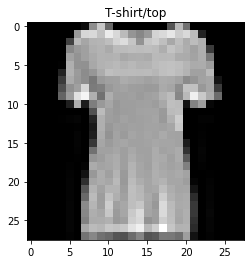

In [4]:
# Visualize a training sample
i = 10
print(f"The {i}th training example:")
print(X_train[i])
print(f"The {i} th training label is: {y_train[i]}: {class_to_label[y_train[i]]}")

plt.imshow(X_train[i], cmap = 'gray');
plt.title(class_to_label[y_train[i]]);

In [5]:
# Check the shapes of train and test data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
# Function to visualize multiple random images from the dataset

def visualize_data(images, labels, to_plot = 12, class_to_label = class_to_label):
  """
  Visualize data by plotting a given number of random images.
  """
  ax = plt.figure(figsize = (12, to_plot/4 *3))
  for i in range(to_plot):
    random_choice = np.random.choice(len(labels))
    ax = plt.subplot(to_plot/4, 4, i+1)
    ax = plt.imshow(images[random_choice], cmap = 'gray')
    ax = plt.title(class_to_label[labels[random_choice]], fontdict={'fontsize': 15, 'color': 'green'})
    ax = plt.axis(False)


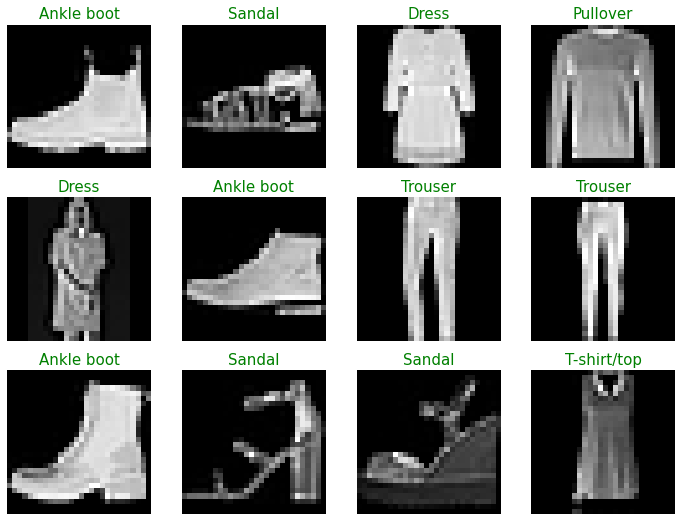

In [7]:
visualize_data(X_train, y_train)

## Build a model
Since this is a multiclass classification problem, we'll need to make a few changes to our architecture.

* The **input shape** will have to deal with `28x28` tensors (the height and width of our images).
  * We're actually going to squash the input into a tensor (vector) of shape `(784)`.
* The **output shape** will have to be `10` because we need our model to predict for 10 different classes.
  * We'll also change the `activation` parameter of our output layer to be [`"softmax"`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) instead of `'sigmoid'`. As we'll see the `"softmax"` activation function outputs a series of values between 0 & 1 (the same shape as **output shape**, which together add up to ~1. The index with the highest value is predicted by the model to be the most *likely* class.
* We'll need to change our loss function from a binary loss function to a multiclass loss function. 
  * More specifically, since our labels are in integer form, we'll use [`tf.keras.losses.SparseCategoricalCrossentropy()`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy), if our labels were one-hot encoded (e.g. they looked something like `[0, 0, 1, 0, 0...]`), we'd use [`tf.keras.losses.CategoricalCrossentropy()`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy).[Important]
* We'll also use the `validation_data` parameter when calling the `fit()` function. This will give us an idea of how the model performs on the test set during training.


In [8]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
                      tf.keras.layers.Flatten(input_shape = (28,28)),
                      tf.keras.layers.Dense(4, activation = 'relu'),
                      tf.keras.layers.Dense(4, activation = 'relu'),
                      tf.keras.layers.Dense(10, activation = 'softmax')
])


model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

non_norm_history_1 = model_1.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.8192 - accuracy: 0.1345 - val_loss: 1.7951 - val_accuracy: 0.2100
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7426 - accuracy: 0.2323 - val_loss: 1.6439 - val_accuracy: 0.3022
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6413 - accuracy: 0.2837 - val_loss: 1.6003 - val_accuracy: 0.2818
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6065 - accuracy: 0.2888 - val_loss: 1.5964 - val_accuracy: 0.2958
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5988 - accuracy: 0.3031 - val_loss: 1.5948 - val_accuracy: 0.3005
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5888 - accuracy: 0.3078 - val_loss: 1.5678 - val_accuracy: 0.3195
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5668 - accuracy: 0.3213 - val_loss: 1.5695 - val_accuracy:

In [9]:
# What does flatten layers do?
temp_model = tf.keras.Sequential([
                      tf.keras.layers.Flatten(input_shape = (28,28))])
temp_model.output_shape

(None, 784)

In [10]:
oh_y_train = tf.one_hot(y_train, depth = 10)
oh_y_test = tf.one_hot(y_test, depth = 10)

In [11]:
oh_y_test.shape

TensorShape([10000, 10])

In [12]:
oh_y_test[:5]

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)>

In [13]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                      tf.keras.layers.Flatten(input_shape = (28,28)),
                      tf.keras.layers.Dense(4, activation = 'relu'),
                      tf.keras.layers.Dense(4, activation = 'relu'),
                      tf.keras.layers.Dense(10, activation = 'softmax')
])


model_2.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

non_norm_history_2 = model_2.fit(X_train, oh_y_train, epochs = 10, validation_data = (X_test, oh_y_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.8192 - accuracy: 0.1345 - val_loss: 1.7951 - val_accuracy: 0.2100
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7426 - accuracy: 0.2323 - val_loss: 1.6439 - val_accuracy: 0.3022
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6413 - accuracy: 0.2837 - val_loss: 1.6003 - val_accuracy: 0.2818
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6065 - accuracy: 0.2888 - val_loss: 1.5964 - val_accuracy: 0.2958
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5988 - accuracy: 0.3031 - val_loss: 1.5948 - val_accuracy: 0.3005
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5888 - accuracy: 0.3078 - val_loss: 1.5678 - val_accuracy: 0.3195
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5668 - accuracy: 0.3213 - val_loss: 1.5695 - val_accuracy:

In [14]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 4)                 3140      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


## Scaling/Normalizing the data

Divide pixels by 255 to bring between 0 and 1.

In [15]:
tf.reduce_min(X_train), tf.reduce_max(X_train)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

In [16]:
norm_X_train = X_train / 255.
norm_X_test = X_test/ 255.

In [17]:
tf.reduce_min(norm_X_train),tf.reduce_max(norm_X_train)

(<tf.Tensor: shape=(), dtype=float64, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float64, numpy=1.0>)

In [18]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                      tf.keras.layers.Flatten(input_shape = (28,28)),
                      tf.keras.layers.Dense(4, activation = 'relu'),
                      tf.keras.layers.Dense(4, activation = 'relu'),
                      tf.keras.layers.Dense(10, activation = 'softmax')
])


model_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

norm_history_3 = model_3.fit(norm_X_train, y_train, epochs = 10, validation_data=(norm_X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6479 - accuracy: 0.7706 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5984 - accuracy: 0.7902 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5767 - accuracy: 0.7986 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5611 - accuracy: 0.8017 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5562 - accuracy: 0.8030 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5458 - accuracy: 0.8076 - val_loss: 0.6097 - val_accuracy:

## Visualizing norm and non norm history

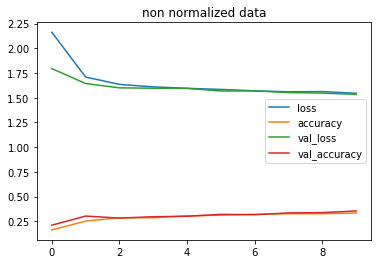

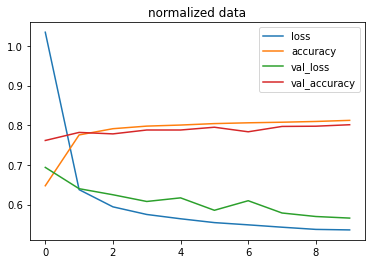

In [19]:
pd.DataFrame(non_norm_history_1.history).plot(title = 'non normalized data')
pd.DataFrame(norm_history_3.history).plot(title = 'normalized data')

## Finding the ideal learning rate

In [20]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape = (28,28)),
                               tf.keras.layers.Dense(4, activation = 'relu'),
                               tf.keras.layers.Dense(4, activation = 'relu'),
                               tf.keras.layers.Dense(10, activation = 'softmax')
])


model_4.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['acc'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_4.fit(norm_X_train, y_train, 
                        epochs = 40, 
                        validation_data = (norm_X_test, y_test),
                        callbacks = [lr_scheduler])


Epoch 1/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4476 - acc: 0.5004 - val_loss: 0.6937 - val_acc: 0.7617
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6479 - acc: 0.7707 - val_loss: 0.6400 - val_acc: 0.7808
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5978 - acc: 0.7901 - val_loss: 0.6278 - val_acc: 0.7770
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5768 - acc: 0.7978 - val_loss: 0.6122 - val_acc: 0.7871
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5630 - acc: 0.7995 - val_loss: 0.6061 - val_acc: 0.7913
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5577 - acc: 0.8003 - val_loss: 0.5917 - val_acc: 0.7940
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5506 - acc: 0.8043 - val_loss: 0.5898 - val_acc: 0.7896
Epoch 8/40
1875/1875 [==============================] - 3s 1ms

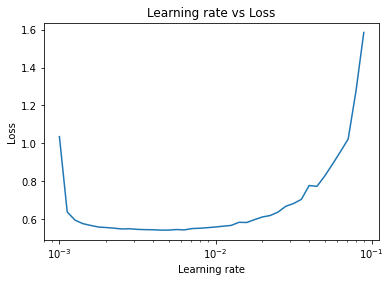

In [21]:
# Plot learnign rate decay curve [Important]

lrs = 1e-3 * 10**(tf.range(40)/20)
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Learning rate vs Loss');

This shows that our ideal learning rate is 0.001 which is the same as the default lr we are currently using.

In [22]:
# Retraining with ideal learning rate (0.001)
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape = (28,28)),
                               tf.keras.layers.Dense(4, activation = 'relu'),
                               tf.keras.layers.Dense(4, activation = 'relu'),
                               tf.keras.layers.Dense(10, activation = 'softmax')
])


model_5.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = ['acc'])


history_5 = model_5.fit(norm_X_train, y_train, 
                        epochs = 20, 
                        validation_data = (norm_X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4476 - acc: 0.5004 - val_loss: 0.6937 - val_acc: 0.7617
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6479 - acc: 0.7706 - val_loss: 0.6400 - val_acc: 0.7820
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5984 - acc: 0.7902 - val_loss: 0.6247 - val_acc: 0.7783
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5767 - acc: 0.7986 - val_loss: 0.6078 - val_acc: 0.7881
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5611 - acc: 0.8017 - val_loss: 0.6169 - val_acc: 0.7881
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5562 - acc: 0.8030 - val_loss: 0.5855 - val_acc: 0.7951
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5458 - acc: 0.8076 - val_loss: 0.6097 - val_acc: 0.7836
Epoch 8/20
1875/1875 [==============================] - 3s 1ms

## Model Evaluation

To evaluate our multiclass classification model we can:
* Evaluate its performance using other classification metrics (such as a [confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py) or [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)).
* Assess some of its predictions (through visualizations).
* Improve its accuracy (by training it for longer or changing the architecture).
* Save and export it for use in an application.


> Remember to make predictions on same kind of data as what the model was trained on eg. If your model was trained on normalized data make predictions on normalized data else you might get some unexpected results.


In [23]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [24]:
class_to_label.values()

dict_values(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])

In [25]:
y_probs = model_5.predict(norm_X_test)
y_probs[:5], y_probs[0], tf.argmax(y_probs[0]), class_to_label[tf.argmax(y_probs[0]).numpy()]

(array([[8.5630336e-11, 3.5361509e-13, 2.6633865e-05, 4.6356046e-08,
         5.0950021e-05, 9.6119225e-02, 8.1778381e-08, 9.1868617e-02,
         4.0605213e-03, 8.0787390e-01],
        [3.4278683e-06, 1.2899412e-16, 9.5989138e-01, 2.0516255e-07,
         1.5329245e-02, 2.4532243e-13, 2.4142915e-02, 1.1383623e-28,
         6.3271803e-04, 4.4789552e-08],
        [6.1063176e-05, 9.9657673e-01, 4.3867061e-08, 3.3405994e-03,
         1.3249499e-05, 1.4383491e-21, 8.2790693e-06, 7.3237471e-18,
         5.4811817e-08, 4.9225428e-14],
        [7.5031145e-05, 9.9053687e-01, 4.2528288e-07, 9.2231687e-03,
         1.3623090e-04, 1.8276231e-18, 2.6808115e-05, 4.8124743e-14,
         1.4521548e-06, 2.2211462e-11],
        [7.2190031e-02, 1.5495797e-06, 2.5566885e-01, 1.0363121e-02,
         4.3541368e-02, 1.1069260e-13, 6.1693019e-01, 6.7543135e-23,
         1.3049162e-03, 1.2140360e-09]], dtype=float32),
 array([8.5630336e-11, 3.5361509e-13, 2.6633865e-05, 4.6356046e-08,
        5.0950021e-05, 9.

In [26]:
y_preds = tf.argmax(y_probs, axis = 1)
y_preds[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])>

In [27]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_preds)
conf_mat

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

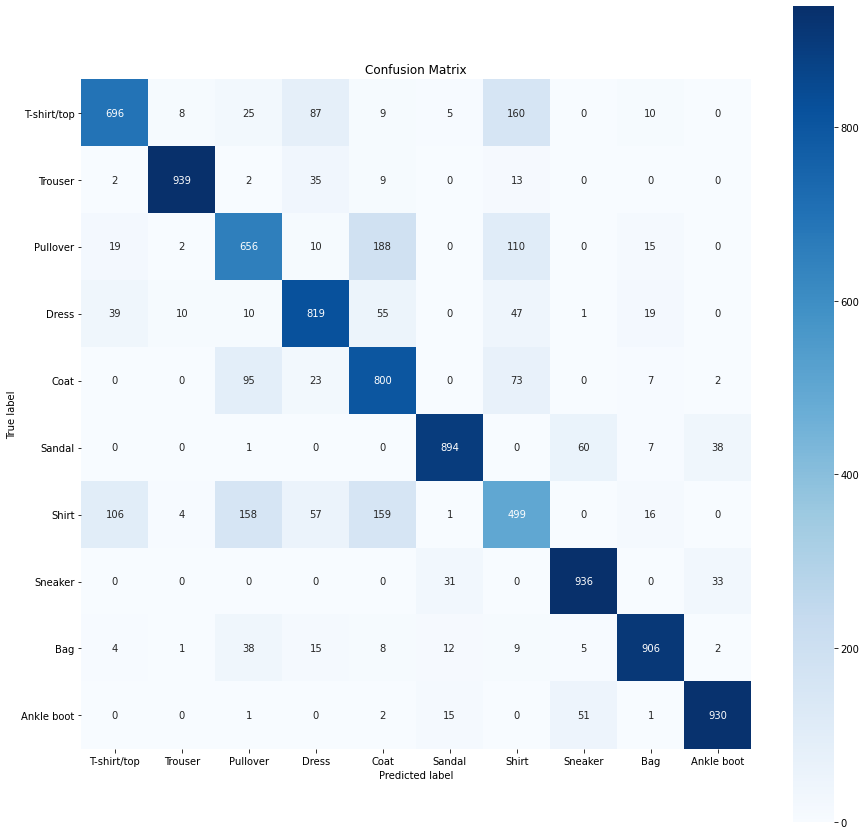

In [28]:
# Visualize confusion matrix using seaborn heaatmap [Important]
import seaborn as sns
ax = plt.figure(figsize = (15,15))
ax = sns.heatmap(conf_mat.astype('int'), cmap = 'Blues', annot = True, fmt = 'd', square = True)
# Label the axes
ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(0.5,len(class_to_label)), # create enough axis slots for each class
         yticks=np.arange(0.5,len(class_to_label)), 
         xticklabels=class_to_label.values(), # axes will labeled with class names (if they exist) or ints
         yticklabels=class_to_label.values());
# ax = plt.xlabel("Predicted label",fontsize=15) # To set font size
# ax = plt.xlabel("True label",fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='center', va = 'top');
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right');
# ax.set_ylim([0,10])
# ax.yaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0.5))

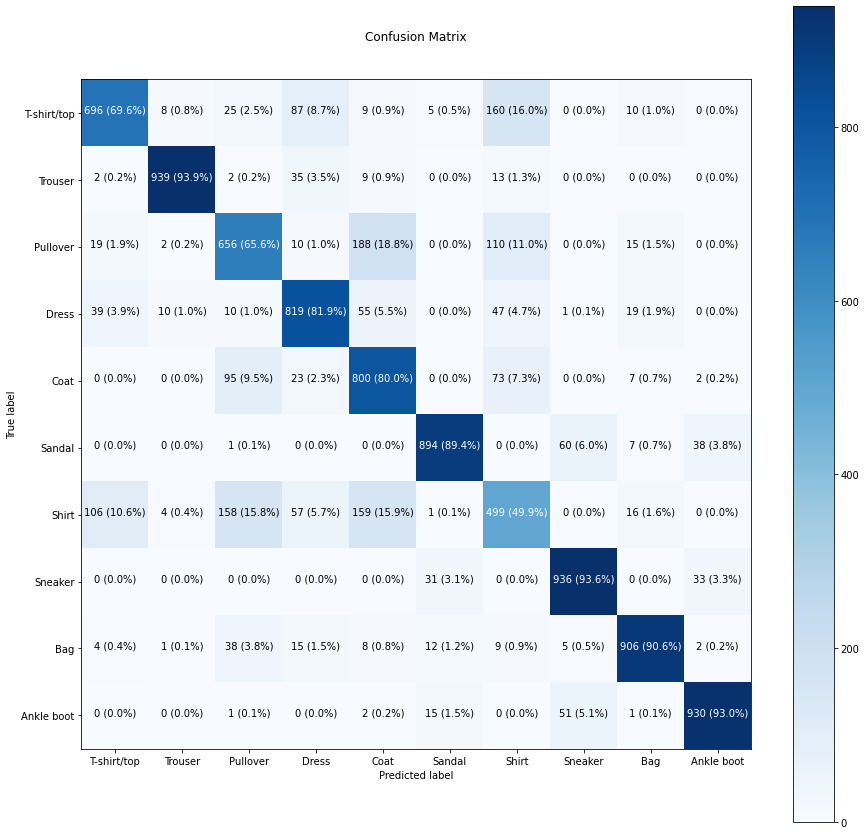

In [29]:
# Visualize confusion matrix using our function

make_confusion_matrix(y_true = y_test, y_pred = y_preds, classes=class_to_label.values(), figsize=(15, 15), text_size=10)

## Visualize random images with predictions

In [75]:
# Function to plot random image with predictions

def plot_random_image(model, images, true_labels, classes):
  """
  picks a random image, gets a prediction on the image and plots image with true and predicted label.
  """
  
  # Set random integer
  i = np.random.randint(0, len(images))

  # Get image, predicted and true label
  img = images[i]
  pred_probs = model.predict(img.reshape(1,28,28))
  pred_label = classes[tf.argmax(pred_probs[0]).numpy()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(img, cmap = plt.cm.binary)

  # xlabel color = 'red' if prediction wrong else 'green'
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  # Add info to plot
  plt.xlabel(f'Pred Prob: {100*tf.reduce_max(pred_probs):.2f}  Pred_label:  {pred_label}', 
             fontdict = {'fontsize':12},
             color = color) # Set color to green or red depending on right or wrong prediction
  plt.title(f'Truth label: {true_label}', color = color, fontdict = {'fontsize':12})

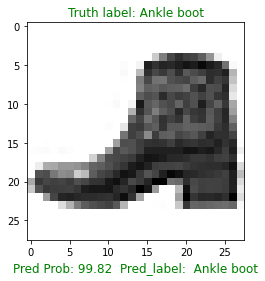

In [76]:
plot_random_image(model_5, norm_X_test, y_test, list(class_to_label.values()))

## What patterns is our model learning?
**Unwrapping a deep learning model. [Important]**  

In [77]:
model_5.layers

In [79]:
# Get the first dense layer
model_5.layers[1]

In [81]:
# Get weights and biases of a layer in our model
weights, biases = model_5.layers[1].get_weights()
weights.shape, biases.shape, weights, biases

((784, 4), (4,), array([[ 0.7150263 , -0.06077094, -0.99763054, -1.048431  ],
        [ 0.27732128, -0.47155392, -0.5291646 ,  0.02329262],
        [ 0.775243  ,  0.540276  , -1.1288569 , -0.7426157 ],
        ...,
        [-0.39453438,  0.47628698, -0.22641574,  0.25505954],
        [-0.4051576 ,  0.6181001 ,  0.23928389, -0.5038765 ],
        [ 0.23884599,  0.11606929, -0.12131333,  0.04352435]],
       dtype=float32), array([ 2.4485605e-02, -6.1463297e-04, -2.7230164e-01,  8.1124890e-01],
       dtype=float32))

In [82]:
 model_5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_14 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


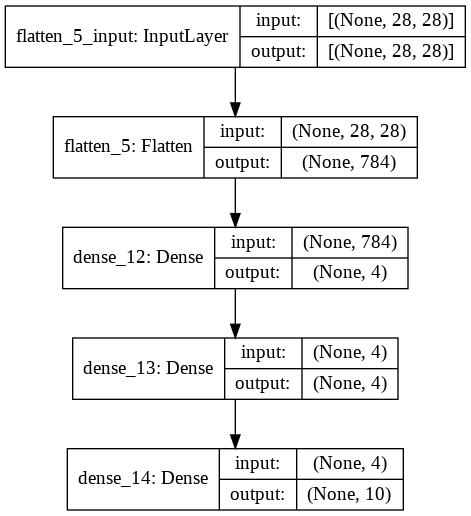

In [84]:
tf.keras.utils.plot_model(model_5, show_shapes=True)